In [1]:
import csv

p1, p2, p3, p4 = 0, 0, 0, 0
with open('click_stream.csv', mode='r') as csv_file: # открываем файл
    reader = csv.DictReader(csv_file) # читаем файл
    for row in reader:
        if '1' in row['page']:
            p1 += 1
        elif '2' in row['page']:
            p2 += 1
        elif '3' in row['page']:
            p3 += 1
        elif '4' in row['page']:
            p4 += 1
print(p1+p2+p3+p4)

142082


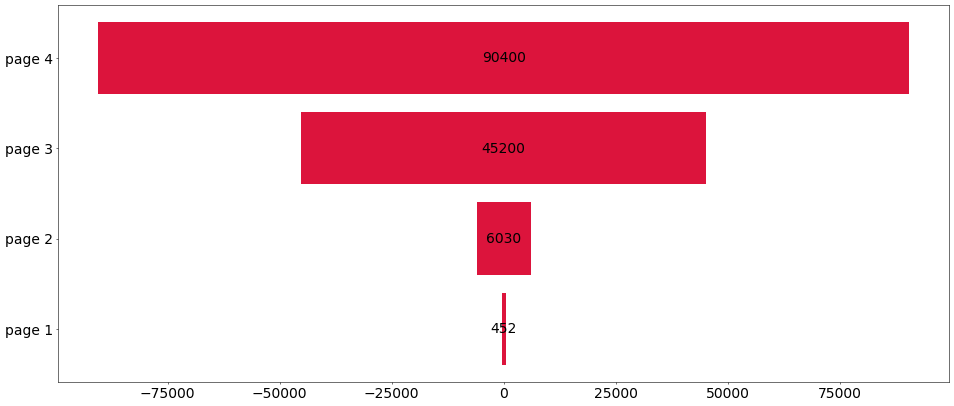

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


h = [p1, p2, p3, p4]
h = h[::-1]
r = ['page 1', 'page 2', 'page 3', 'page 4']
plt.figure(figsize=(23,10), dpi= 50)
h = np.array(h)
plt.gca().use_sticky_edges = False
plt.barh(r, width=h*2, left=-h, align='center', color='crimson')
i=0
for ri in r:
    plt.text(x=0, y=r[i], s=h[i], ha='center', va='center', color='black', size=20)
    i+=1
# plt.xticks([]) # optionally remove standard y ticks and their labels   - отключение

# изменение размеров подписей по осям
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [3]:
d1, d2, d3, d4 = 0, 0, 0, 0
with open('click_stream.csv', mode='r') as csv_file: # открываем файл
    reader = csv.DictReader(csv_file) # читаем файл
    for row in reader:
        if '-01-' in row['date']:
            d1 += 1
        elif '-02-' in row['date']:
            d2 += 1
        elif '-03-' in row['date']:
            d3 += 1
        elif '-04-' in row['date']:
            d4 += 1
print(d1+d2+d3+d4)

142082


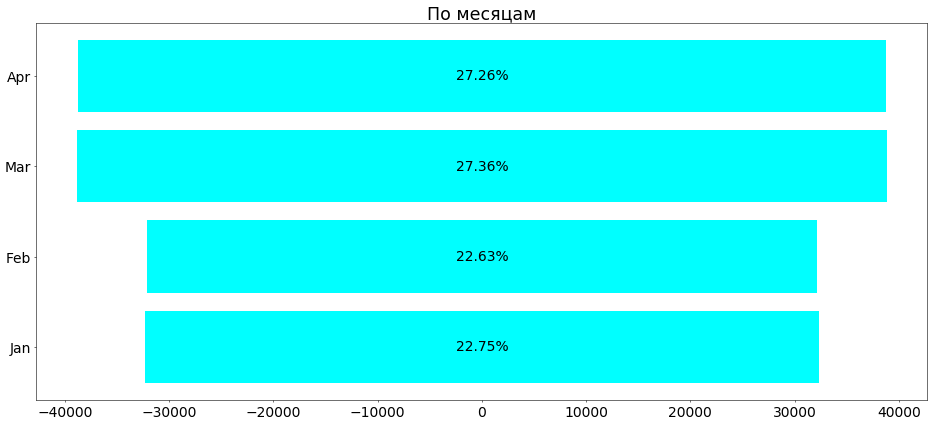

In [13]:
h = [d1, d2, d3, d4]
h = h[::-1]
r = ['Jan', 'Feb', 'Mar', 'Apr']
plt.figure(figsize=(23,10), dpi= 50)
h = np.array(h)
plt.gca().use_sticky_edges = False
plt.barh(r, width=h*2, left=-h, align='center', color='cyan')
i=0
for ri in r:
    plt.text(x=0, y=r[i], s=f'{round(h[i]/sum(h)*100, 2)}%', ha='center', va='center', color='black', size=20)
    i+=1
plt.title("По месяцам", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [5]:
import csv

funnel_by_month = {} # создаем словарь, где будут храниться словари за каждый месяц
funnel_template = {'1_home_page':0, '2_search_page':0, '3_payment_page':0, '4_payment_confirmation_page':0}

with open('click_stream.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    
    # проходим циклом по объекту csv_reader
    for row in csv_reader: # берем строку из объекта csv_reader
#         print(list(row.items())[1][1])
#         print(list(row.items())[2][1][:-3])
        page = list(row.items())[1][1] # вытаскиваем название страницы
        event_date = list(row.items())[2][1][:-3] # вытаскиваем дату в формате YYYY-MM
        
        # проверяем существует ли ключ со значением event_date в словаре
        if event_date not in funnel_by_month: # если нет
            funnel_by_month[event_date] = funnel_template.copy() # создаем ключ, в значение копируем заготовку
#         print(funnel_by_month[event_date])
#         # проверяем условиями и прибавляем единицу к нужному ключу в словаре
        if page == '1_home_page':
            funnel_by_month[event_date]['1_home_page'] += 1
        elif page == '2_search_page':
            funnel_by_month[event_date]['2_search_page'] += 1
        elif page == '3_payment_page':
            funnel_by_month[event_date]['3_payment_page'] += 1
        else:
            funnel_by_month[event_date]['4_payment_confirmation_page'] += 1
            
funnel_by_month 

{'2015-02': {'1_home_page': 22600,
  '2_search_page': 13687,
  '3_payment_page': 2412,
  '4_payment_confirmation_page': 173},
 '2015-03': {'1_home_page': 22600,
  '2_search_page': 8879,
  '3_payment_page': 631,
  '4_payment_confirmation_page': 44},
 '2015-01': {'1_home_page': 22600,
  '2_search_page': 13554,
  '3_payment_page': 2390,
  '4_payment_confirmation_page': 189},
 '2015-04': {'1_home_page': 22600,
  '2_search_page': 9080,
  '3_payment_page': 597,
  '4_payment_confirmation_page': 46}}

In [6]:
funnel_by_month_Desktop = {}
funnel_by_month_Mobile = {}
funnel_template = {'1_home_page':0, '2_search_page':0, '3_payment_page':0, '4_payment_confirmation_page':0}

with open('click_stream2.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        page = list(row.items())[1][1]
        event_date = list(row.items())[2][1][:-3]
        dev = list(row.items())[3][1]
        if dev == 'Desktop':
            if event_date not in funnel_by_month_Desktop:
                funnel_by_month_Desktop[event_date] = funnel_template.copy()
            if page == '1_home_page':
                funnel_by_month_Desktop[event_date]['1_home_page'] += 1
            elif page == '2_search_page':
                funnel_by_month_Desktop[event_date]['2_search_page'] += 1
            elif page == '3_payment_page':
                funnel_by_month_Desktop[event_date]['3_payment_page'] += 1
            else:
                funnel_by_month_Desktop[event_date]['4_payment_confirmation_page'] += 1
        else:
            if event_date not in funnel_by_month_Mobile:
                funnel_by_month_Mobile[event_date] = funnel_template.copy()
            if page == '1_home_page':
                funnel_by_month_Mobile[event_date]['1_home_page'] += 1
            elif page == '2_search_page':
                funnel_by_month_Mobile[event_date]['2_search_page'] += 1
            elif page == '3_payment_page':
                funnel_by_month_Mobile[event_date]['3_payment_page'] += 1
            else:
                funnel_by_month_Mobile[event_date]['4_payment_confirmation_page'] += 1
            
print(funnel_by_month_Desktop)
print()
print(funnel_by_month_Mobile)

{'2015-02': {'1_home_page': 15050, '2_search_page': 7632, '3_payment_page': 1191, '4_payment_confirmation_page': 54}, '2015-03': {'1_home_page': 15050, '2_search_page': 7370, '3_payment_page': 296, '4_payment_confirmation_page': 14}, '2015-01': {'1_home_page': 15050, '2_search_page': 7529, '3_payment_page': 1221, '4_payment_confirmation_page': 60}, '2015-04': {'1_home_page': 15050, '2_search_page': 7569, '3_payment_page': 302, '4_payment_confirmation_page': 22}}

{'2015-01': {'1_home_page': 7550, '2_search_page': 6025, '3_payment_page': 1169, '4_payment_confirmation_page': 129}, '2015-04': {'1_home_page': 7550, '2_search_page': 1511, '3_payment_page': 295, '4_payment_confirmation_page': 24}, '2015-03': {'1_home_page': 7550, '2_search_page': 1509, '3_payment_page': 335, '4_payment_confirmation_page': 30}, '2015-02': {'1_home_page': 7550, '2_search_page': 6055, '3_payment_page': 1221, '4_payment_confirmation_page': 119}}


**Домашнее задание**

In [7]:
import csv

funnel_by_month_Male = {}
funnel_by_month_Female = {}
funnel_template = {'1_home_page':0, '2_search_page':0, '3_payment_page':0, '4_payment_confirmation_page':0}

with open('click_stream3.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        page = list(row.items())[1][1]
        event_date = list(row.items())[2][1][:-3]
        gender = list(row.items())[4][1]
        if gender == 'Male':
            if event_date not in funnel_by_month_Male:
                funnel_by_month_Male[event_date] = funnel_template.copy()
            if page == '1_home_page':
                funnel_by_month_Male[event_date]['1_home_page'] += 1
            elif page == '2_search_page':
                funnel_by_month_Male[event_date]['2_search_page'] += 1
            elif page == '3_payment_page':
                funnel_by_month_Male[event_date]['3_payment_page'] += 1
            else:
                funnel_by_month_Male[event_date]['4_payment_confirmation_page'] += 1
        else:
            if event_date not in funnel_by_month_Female:
                funnel_by_month_Female[event_date] = funnel_template.copy()
            if page == '1_home_page':
                funnel_by_month_Female[event_date]['1_home_page'] += 1
            elif page == '2_search_page':
                funnel_by_month_Female[event_date]['2_search_page'] += 1
            elif page == '3_payment_page':
                funnel_by_month_Female[event_date]['3_payment_page'] += 1
            else:
                funnel_by_month_Female[event_date]['4_payment_confirmation_page'] += 1
            
print(funnel_by_month_Male)
print()
print(funnel_by_month_Female)

#СОЗДАЙ DF, ЧТОБЫ ПРОСЛЕЖИВАЛАСЬ ТЕНДЕНЦИЯ - ЗАВИСИТ ЛИ ЧТО-НИБУДЬ ОТ ПОЛА ПОСЕТИТЕЛЯ САЙТА 


{'2015-02': {'1_home_page': 11401, '2_search_page': 6867, '3_payment_page': 1177, '4_payment_confirmation_page': 87}, '2015-03': {'1_home_page': 11350, '2_search_page': 4425, '3_payment_page': 294, '4_payment_confirmation_page': 18}, '2015-01': {'1_home_page': 11186, '2_search_page': 6641, '3_payment_page': 1147, '4_payment_confirmation_page': 80}, '2015-04': {'1_home_page': 11388, '2_search_page': 4591, '3_payment_page': 312, '4_payment_confirmation_page': 26}}

{'2015-02': {'1_home_page': 11199, '2_search_page': 6820, '3_payment_page': 1235, '4_payment_confirmation_page': 86}, '2015-03': {'1_home_page': 11250, '2_search_page': 4454, '3_payment_page': 337, '4_payment_confirmation_page': 26}, '2015-01': {'1_home_page': 11414, '2_search_page': 6913, '3_payment_page': 1243, '4_payment_confirmation_page': 109}, '2015-04': {'1_home_page': 11212, '2_search_page': 4489, '3_payment_page': 285, '4_payment_confirmation_page': 20}}


In [8]:
import pandas as pd

df_male = pd.DataFrame()
df_female = pd.DataFrame()

for s in funnel_by_month_Male:
    d = None
    d = []
    for p in funnel_by_month_Male[s]:
        d.append(funnel_by_month_Male[s][p])
    df_male[s] =[round(x/sum(d)*100, 2) for x in d]
    df_male.index=['page_1','page_2','page_3','page_4']
    
for s in funnel_by_month_Female:
    d = None
    d = []
    for p in funnel_by_month_Female[s]:
        d.append(funnel_by_month_Female[s][p])
    df_female[s] = [round(x/sum(d)*100, 2) for x in d]
    df_female.index=['page_1','page_2','page_3','page_4']
    
print('Ниже приведены данные в процентах')
print(df_male)
print()
print(df_female)
print('\nВидно, что динамика пользователей, дошедших до всех страниц на нашем сайте, одинакова для обоих полов. На')
print('основании этого можем сделать вывод, что пол посетителей сайта в нашем исследовании никакой роли не играет.')

Ниже приведены данные в процентах
        2015-02  2015-03  2015-01  2015-04
page_1    58.37    70.55    58.71    69.79
page_2    35.16    27.51    34.85    28.14
page_3     6.03     1.83     6.02     1.91
page_4     0.45     0.11     0.42     0.16

        2015-02  2015-03  2015-01  2015-04
page_1    57.91    70.02    58.00    70.05
page_2    35.26    27.72    35.13    28.05
page_3     6.39     2.10     6.32     1.78
page_4     0.44     0.16     0.55     0.12

Видно, что динамика пользователей, дошедших до всех страниц на нашем сайте, одинакова для обоих полов. На
основании этого можем сделать вывод, что пол посетителей сайта в нашем исследовании никакой роли не играет.
